In [1]:
#inspect_pdm.ipynb
#
#Copyright (c) 2019, Joe Hahn
#
#by Joe Hahn
#joe.hahn@oracle.com
#17 September 2018
#
#inspect pdm output and compare to rtf simulation

In [2]:
#import python & helper_fns used below
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)    #tell pandas to display all columns

In [3]:
#import plotting libraries
#use following line when in Jupyter
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
sns.set(font_scale=1.5, font='DejaVu Sans')

In [4]:
#read input parameters
inputs_path = 'inputs_pdm.py'
exec(open(inputs_path).read())
print ('inputs_path = ', inputs_path)
print ('debug = ', debug)
print ('N_devices = ', N_devices)
print ('sensor_sigma = ', sensor_sigma)
print ('N_timesteps = ', N_timesteps)
print ('time_start = ', time_start)
print ('output_interval = ', output_interval)
print ('strategy = ', strategy)
print ('pdm_threshold_time = ', pdm_threshold_time)
print ('pdm_threshold_probability = ', pdm_threshold_probability)
print ('pdm_skip_time = ', pdm_skip_time)
print ('N_technicians = ', N_technicians)
print ('repair_duration = ', repair_duration)
print ('maintenance_duration = ', maintenance_duration)
print ('rn_seed = ', rn_seed)
print ('issues = ', issues)

inputs_path =  inputs_pdm.py
debug =  True
N_devices =  700
sensor_sigma =  0.01
N_timesteps =  20000
time_start =  0
output_interval =  10
strategy =  pdm
pdm_threshold_time =  400
pdm_threshold_probability =  0.5
pdm_skip_time =  5
N_technicians =  70
repair_duration =  100
maintenance_duration =  25
rn_seed =  18
issues =  {'jammed_plunger': {'coefficient': 8e-05, 'fatal': True, 'ID': 1}, 'cracked_valve': {'coefficient': 1e-05, 'fatal': True, 'ID': 2}, 'crud': {'coefficient': 0.1, 'fatal': False, 'ID': 0}, 'broken_rods': {'coefficient': 2e-06, 'fatal': True, 'ID': 3}}


In [5]:
#get telemetry data, repairs data, and records=telemetry.join.repairs
time_bucket_size = 20
telemetry_file = 'data/telemetry_pdm.csv.gz'
repairs_file = 'data/repairs_pdm.csv.gz'
from helper_fns import * 
telemetry, repairs, records = prep_rtf_data(time_bucket_size, issues, telemetry_file, repairs_file)
print (records.dtypes)
print ('telemetry.shape = ', telemetry.shape)
print ('repairs.shape = ', repairs.shape)
print ('records.shape = ', records.shape)
records.head()

reading data/telemetry_pdm.csv.gz ...
pivoting telemetry...
reading data/repairs_pdm.csv.gz ...
merging telemetry and repairs...
issue_names =  ['jammed_plunger', 'cracked_valve', 'broken_rods']
computing time to next issue...
computing time since previous issue...
deviceID                       int64
time_bucket                    int64
time                           int64
load                         float64
pressure                     float64
temperature                  float64
production_rate              float64
technicianID                   int32
issue                         object
production_rate_fail         float64
temperature_fail             float64
pressure_fail                float64
load_fail                    float64
time_til_jammed_plunger       object
time_til_cracked_valve        object
time_til_broken_rods          object
time_since_jammed_plunger     object
time_since_cracked_valve      object
time_since_broken_rods        object
dtype: object
telemetry.shape =

,deviceID,time_bucket,time,load,pressure,temperature,production_rate,technicianID,issue,production_rate_fail,temperature_fail,pressure_fail,load_fail,time_til_jammed_plunger,time_til_cracked_valve,time_til_broken_rods,time_since_jammed_plunger,time_since_cracked_valve,time_since_broken_rods
0,0,0,0,0.018964,0.112802,-0.009005,0.988686,-1,none,NaN,NaN,NaN,NaN,480,2480,10240,NaN,NaN,NaN
1,0,1,20,-0.053944,0.143376,-0.042545,0.984192,-1,none,NaN,NaN,NaN,NaN,460,2460,10220,NaN,NaN,NaN
2,0,2,40,-0.067030,0.123918,0.040835,0.983929,-1,none,NaN,NaN,NaN,NaN,440,2440,10200,NaN,NaN,NaN
3,0,3,60,-0.084640,0.119711,0.020399,0.985041,-1,none,NaN,NaN,NaN,NaN,420,2420,10180,NaN,NaN,NaN
4,0,4,80,-0.136025,0.079123,0.013208,0.983694,-1,none,NaN,NaN,NaN,NaN,400,2400,10160,NaN,NaN,NaN


In [6]:
#get list of fatal issues
print ('issues = ', issues)
fatal_issues = [issue_name for issue_name, d in issues.iteritems() if (d['fatal'] == True)]
print ('fatal_issues = ', fatal_issues)

issues =  {'jammed_plunger': {'coefficient': 8e-05, 'fatal': True, 'ID': 1}, 'cracked_valve': {'coefficient': 1e-05, 'fatal': True, 'ID': 2}, 'crud': {'coefficient': 0.1, 'fatal': False, 'ID': 0}, 'broken_rods': {'coefficient': 2e-06, 'fatal': True, 'ID': 3}}
fatal_issues =  ['jammed_plunger', 'cracked_valve', 'broken_rods']


In [7]:
#show telemetry records
telemetry.tail()

,time,deviceID,sensor,value,time_bucket
7736037,19999,-1,N_technicians,60.0,999
7736038,19999,-1,N_operating,640.0,999
7736039,19999,-1,N_failed,0.0,999
7736040,19999,-1,N_repair,38.0,999
7736041,19999,-1,N_maintenance,22.0,999


In [8]:
#show repairs records
repairs.head()

,time_bucket,deviceID,technicianID,issue,production_rate_fail,temperature_fail,pressure_fail,load_fail
0,1,546,33,jammed_plunger,0.000000,0.022686,0.032947,0.125144
1,1,250,56,jammed_plunger,0.000000,0.015760,0.004323,0.123831
2,2,295,58,jammed_plunger,0.000000,0.029625,0.033126,0.123594
3,3,379,48,jammed_plunger,0.000000,-0.007826,0.008361,0.123564
4,4,270,58,jammed_plunger,0.979934,0.137333,-0.139273,-0.044817


In [9]:
#show repairs records
repairs.tail()

,time_bucket,deviceID,technicianID,issue,production_rate_fail,temperature_fail,pressure_fail,load_fail
18533,999,94,38,jammed_plunger,0.00000,0.642749,0.079666,0.182263
18534,999,381,27,jammed_plunger,0.00000,-0.197728,0.122419,0.231624
18535,999,274,19,jammed_plunger,0.00000,-0.065266,-0.383439,0.207651
18536,999,91,48,broken_rods,0.00000,-0.146226,-0.047924,0.105601
18537,999,89,5,jammed_plunger,0.98718,0.006113,0.016859,-0.126936


In [10]:
#check time for each device to hit next issue
df = records
cols = ['deviceID', 'time', 'issue'] + [col for col in df.columns if (col.endswith('_fail'))] + \
    [col for col in df.columns if (col.startswith('time_til_'))] + \
    [col for col in df.columns if (col.startswith('time_since_'))]
df[51:61][cols]

,deviceID,time,issue,production_rate_fail,temperature_fail,pressure_fail,load_fail,time_til_jammed_plunger,time_til_cracked_valve,time_til_broken_rods,time_since_jammed_plunger,time_since_cracked_valve,time_since_broken_rods
51,0,1020,none,NaN,NaN,NaN,NaN,1880,1460,9220,180,NaN,NaN
52,0,1040,none,NaN,NaN,NaN,NaN,1860,1440,9200,200,NaN,NaN
53,0,1060,none,NaN,NaN,NaN,NaN,1840,1420,9180,220,NaN,NaN
54,0,1080,none,NaN,NaN,NaN,NaN,1820,1400,9160,240,NaN,NaN
55,0,1100,none,NaN,NaN,NaN,NaN,1800,1380,9140,260,NaN,NaN
56,0,1120,none,NaN,NaN,NaN,NaN,1780,1360,9120,280,NaN,NaN
57,0,1140,none,NaN,NaN,NaN,NaN,1760,1340,9100,300,NaN,NaN
58,0,1160,none,NaN,NaN,NaN,NaN,1740,1320,9080,320,NaN,NaN
59,0,1180,none,NaN,NaN,NaN,NaN,1720,1300,9060,340,NaN,NaN
60,0,1200,none,NaN,NaN,NaN,NaN,1700,1280,9040,360,NaN,NaN


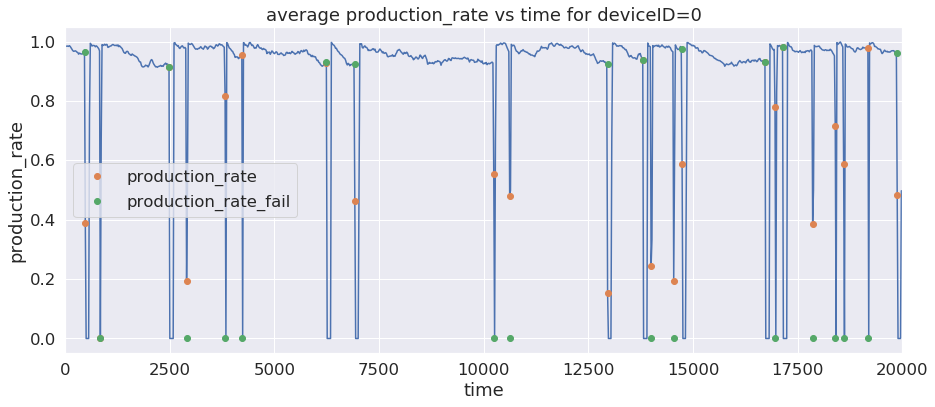

In [11]:
#plot production_rate vs time for deviceID=0
deviceID = 0
df = records
df = df[df.deviceID == deviceID]
xp = df.time
yp = df.production_rate
sns.set(font_scale=1.5, font='DejaVu Sans')
fig, ax = plt.subplots(1,1, figsize=(15, 6))
p = ax.plot(xp, yp, linestyle='-', label='')
df = df[df.issue != 'none']
xp = df.time
yp = df.production_rate
p = ax.plot(xp, yp, linestyle='none', marker='o', label='production_rate')
yp = df.production_rate_fail
p = ax.plot(xp, yp, linestyle='none', marker='o', label='production_rate_fail')
p = ax.set_title('average production_rate vs time for deviceID=' + str(deviceID))
p = ax.set_xlabel('time')
p = ax.set_ylabel('production_rate')
p = ax.set_xlim(0, 20000)
leg = ax.legend()

In [12]:
#get list of deviceIDs
df = records
deviceIDs = df.deviceID.unique().tolist()

In [13]:
#list issues & their frequency
df = records
N = df.groupby('issue')['time'].count().sort_values(ascending=False)
print (N)
issues = N.index.tolist()
issues.remove('none')
print ('issues = ', issues)
N_issues = N[issues].sum()
print ('N_issues = ', N_issues)

issue
none              681462
jammed_plunger     13292
cracked_valve       3967
broken_rods         1279
Name: time, dtype: int64
issues =  ['jammed_plunger', 'cracked_valve', 'broken_rods']
N_issues =  18538


[70L, 110L, 165L, 214L, 240L, 331L, 361L, 394L, 408L]


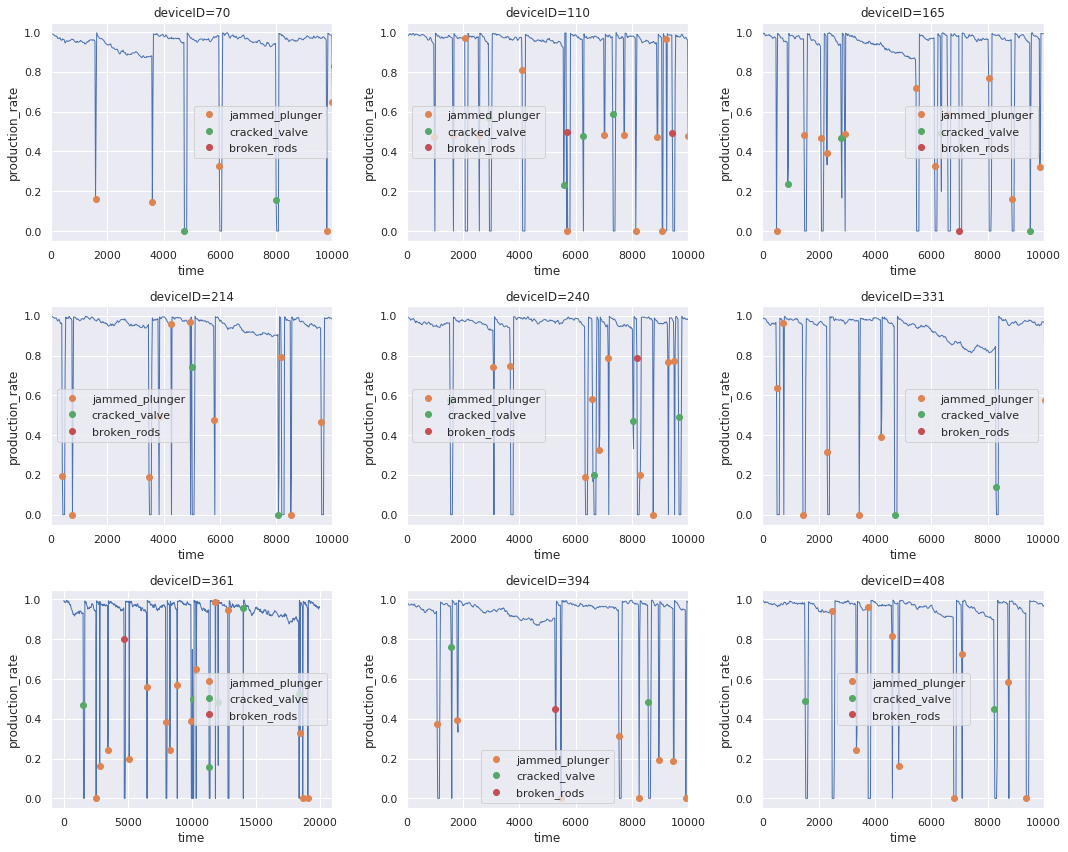

In [14]:
#plot array of production_rates vs time for randomly selected deviceIDs
Nxy = 3
N = Nxy**2
random_deviceIDs = np.sort(np.random.choice(deviceIDs, size=N)).tolist()
print (random_deviceIDs)
sns.set(font_scale=1.0, font='DejaVu Sans')
f, axes = plt.subplots(Nxy, Nxy, figsize=(15, 12))
axes = axes.reshape(N)
for idx in range(N):
    deviceID = random_deviceIDs[idx]
    df = records
    jdx = (df.deviceID == deviceID)
    df = df[jdx]
    xp = df.time
    yp = df.production_rate
    ax = axes[idx]
    p = ax.plot(xp, yp, linewidth=1, linestyle='-', label='')
    for issue in issues:
        dfs = df[df.issue == issue]
        if (len(dfs) > 0):
            xp = dfs.time
            yp = dfs.production_rate
            p = ax.plot(xp, yp, linestyle='none', marker='o', markersize=6, label=issue)
    p = ax.set_title('deviceID=' + str(deviceID))
    p = ax.set_xlabel('time')
    p = ax.set_ylabel('production_rate')
    if (xp.max() > 10000):
        p = ax.set_xlim(0, 10000)
    leg = ax.legend()
plt.tight_layout()

In [15]:
#compute avg production_rate (aka production efficiency) vs time
production_rate_avg = records.groupby('time')['production_rate'].mean()
idx = production_rate_avg.index > production_rate_avg.index.values.mean()
mean_production_rate_avg = production_rate_avg[idx].mean()
print( 'mean_production_rate_avg = ', mean_production_rate_avg)
idx = records.production_rate > 0.5
pr = records[idx].production_rate.mean()
print ('pr = ', pr)
max_production_rate = pr - (N_issues*repair_duration)*1.0/(N_devices*N_timesteps)
print ('max_production_rate = ', max_production_rate)

mean_production_rate_avg =  0.892817299509
pr =  0.959125429776
max_production_rate =  0.8267111440620013


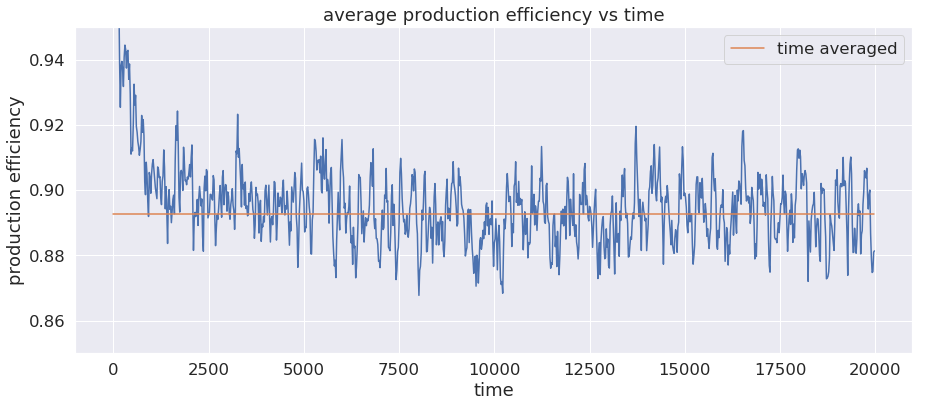

In [16]:
#plot avg production_rate vs time
sns.set(font_scale=1.5, font='DejaVu Sans')
fig, ax = plt.subplots(1,1, figsize=(15, 6))
yp = production_rate_avg
p = ax.plot(yp, linestyle='-', label = '')
yp = yp*0 + mean_production_rate_avg
p = ax.plot(yp, linestyle='-', label = 'time averaged')
p = ax.set_title('average production efficiency vs time')
p = ax.set_xlabel('time')
p = ax.set_ylabel('production efficiency')
p = ax.set_ylim(0.85, 0.95)
p = ax.legend()
plt.savefig('figs/pdm_avg_production.png')

In [17]:
#fraction of technicians utilized
df = telemetry
technician_fraction = df[df.sensor == 'N_technicians'][['time', 'value']]
technician_fraction['technician_fraction'] = technician_fraction.value/N_technicians
idx = (technician_fraction.time > N_timesteps/2)
technician_fraction_mean = technician_fraction[idx].technician_fraction.mean()
technician_fraction_std = technician_fraction[idx].technician_fraction.std()
print ('technician_fraction_mean = ', technician_fraction_mean)
print ('technician_fraction_std = ', technician_fraction_std)
technician_fraction.tail()

technician_fraction_mean =  0.729904419013
technician_fraction_std =  0.103908687656


,time,value,technician_fraction
7734793,19995,62.0,0.885714
7735174,19996,61.0,0.871429
7735585,19997,61.0,0.871429
7735590,19998,60.0,0.857143
7736037,19999,60.0,0.857143


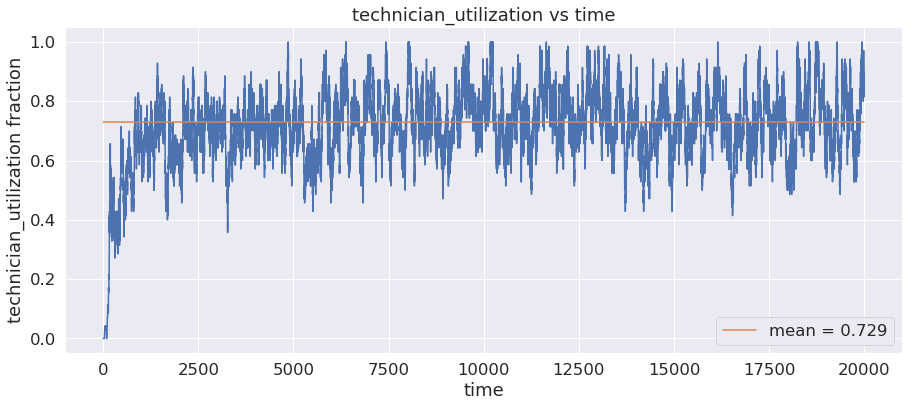

In [18]:
#plot technician_utilization vs time
xp = technician_fraction.time
yp = technician_fraction.technician_fraction
sns.set(font_scale=1.5, font='DejaVu Sans')
fig, ax = plt.subplots(1,1, figsize=(15, 6))
p = ax.plot(xp, yp, linestyle='-', label='')
yp = yp*0 + technician_fraction_mean
p = ax.plot(xp, yp, linestyle='-', label='mean = ' + str(technician_fraction_mean)[0:5])
p = ax.set_title('technician_utilization vs time')
p = ax.set_xlabel('time')
p = ax.set_ylabel('technician_utilization fraction')
#p = ax.set_ylim(0.7, 1.02)
p = ax.legend()

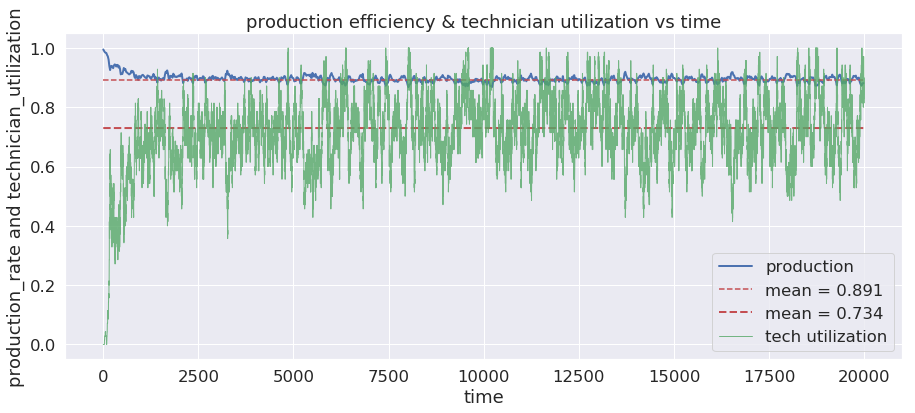

In [19]:
#plot avg production_rate & technician_fraction vs time
sns.set(font_scale=1.5, font='DejaVu Sans')
fig, ax = plt.subplots(1,1, figsize=(15, 6))
yp = production_rate_avg
p = ax.plot(yp, linestyle='-', alpha=1, linewidth=2, label = 'production', color="#4c72b0")
yp = yp*0 + mean_production_rate_avg
p = ax.plot(yp, linestyle='dashed', label = 'mean = 0.891', color="#c44e52")
xp = technician_fraction.time
yp = xp*0 + technician_fraction_mean
p = ax.plot(xp, yp, linestyle='dashed', alpha=1, linewidth=2, label='mean = 0.734', color="#c44e52")
xp = technician_fraction.time
yp = technician_fraction.technician_fraction
p = ax.plot(xp, yp, linestyle='-', alpha=0.8, linewidth=1, label='tech utilization', color="#55a868")
p = ax.set_title('production efficiency & technician utilization vs time')
p = ax.set_xlabel('time')
p = ax.set_ylabel('production_rate and technician_utilization')
p = ax.legend(loc='lower right')
plt.savefig('figs/pdm_production_utilization.png')

In [20]:
#device utilization fraction
df = telemetry
print df.sensor.unique()
operating_fraction = df[df.sensor == 'N_operating'][['time', 'value']]
operating_fraction['device_fraction'] = operating_fraction.value/N_devices
failed_fraction = df[df.sensor == 'N_failed'][['time', 'value']]
failed_fraction['device_fraction'] = failed_fraction.value/N_devices
repair_fraction = df[df.sensor == 'N_repair'][['time', 'value']]
repair_fraction['device_fraction'] = repair_fraction.value/N_devices
maintenance_fraction = df[df.sensor == 'N_maintenance'][['time', 'value']]
maintenance_fraction['device_fraction'] = maintenance_fraction.value/N_devices
maintenance_fraction.tail()

['N_technicians' 'N_operating' 'N_failed' 'N_repair' 'N_maintenance'
 'temperature' 'production_rate' 'pressure' 'load']


,time,value,device_fraction
7734797,19995,23.0,0.032857
7735178,19996,22.0,0.031429
7735589,19997,22.0,0.031429
7735594,19998,22.0,0.031429
7736041,19999,22.0,0.031429


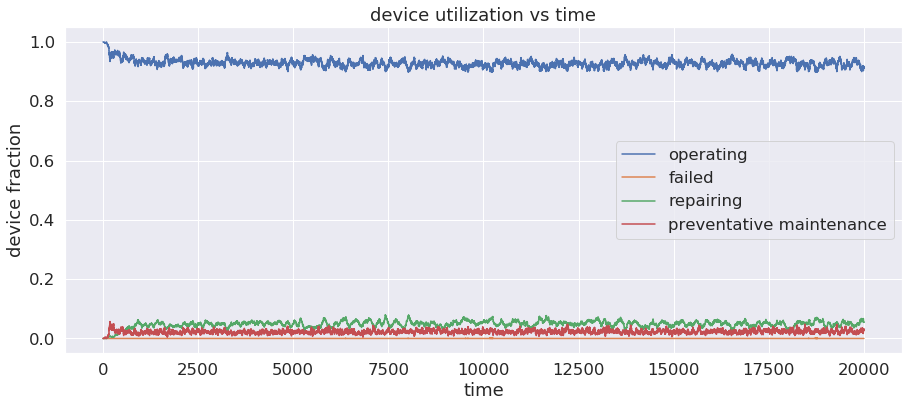

In [21]:
#plot operating_fraction vs time
sns.set(font_scale=1.5, font='DejaVu Sans')
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = operating_fraction.time
yp = operating_fraction.device_fraction
p = ax.plot(xp, yp, linestyle='-', label='operating')
xp = failed_fraction.time
yp = failed_fraction.device_fraction
p = ax.plot(xp, yp, linestyle='-', label='failed')
xp = repair_fraction.time
yp = repair_fraction.device_fraction
p = ax.plot(xp, yp, linestyle='-', label='repairing')
xp = maintenance_fraction.time
yp = maintenance_fraction.device_fraction
p = ax.plot(xp, yp, linestyle='-', label='preventative maintenance')
p = ax.set_title('device utilization vs time')
p = ax.set_xlabel('time')
p = ax.set_ylabel('device fraction')
p = ax.legend()

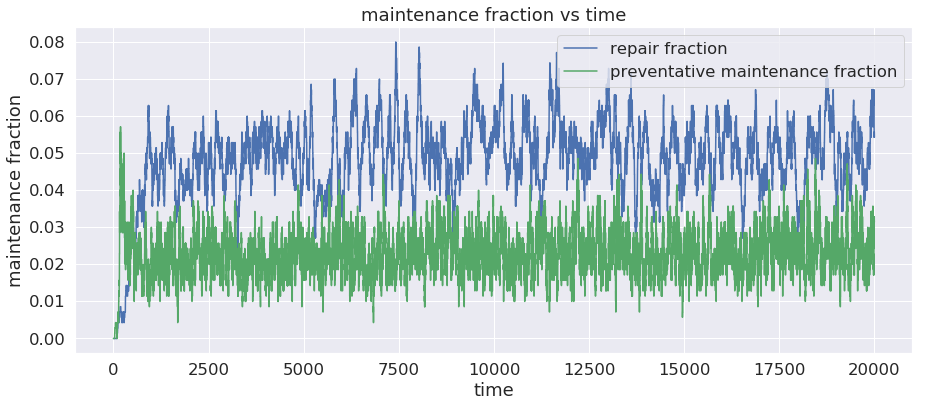

In [22]:
#plot maintenance_fraction vs time
sns.set(font_scale=1.5, font='DejaVu Sans')
fig, ax = plt.subplots(1,1, figsize=(15, 6))
xp = repair_fraction.time
yp = repair_fraction.device_fraction
p = ax.plot(xp, yp, linestyle='-', label='repair fraction')
xp = maintenance_fraction.time
yp = maintenance_fraction.device_fraction
p = ax.plot(xp, yp, linestyle='-', label='preventative maintenance fraction', color="#55a868")
p = ax.set_title('maintenance fraction vs time')
p = ax.set_xlabel('time')
p = ax.set_ylabel('maintenance fraction')
p = ax.legend()
plt.savefig('figs/pdm_maintenance_fraction.png')